In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, AdaBoostRegressor, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.svm import LinearSVC, SVC, SVR

pd.options.display.max_columns = 150


In [6]:
df = pd.read_csv('../data/clean_data_state_response.csv')
clean = pd.read_csv('../data/clean_data.csv')

In [7]:
df.head()

,protestnumber,protesterviolence,participants,notes,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,stateresponse,stateresponse_violence,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,duration,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bhutan,country_Bolivia,country_Bosnia,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo Brazzaville,country_Congo Kinshasa,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Czechoslovakia,country_Denmark,country_Djibouti,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,...,country_Serbia and Montenegro,country_Sierra Leone,country_Singapore,country_Slovak Republic,country_Slovenia,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor Leste,country_Togo,country_Tunisia,country_Turkey,country_Turkmenistan,country_USSR,country_Uganda,country_Ukraine,country_United Arab Emirate,country_United Kingdom,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,region_Asia,region_Central America,region_Europe,region_MENA,region_North America,region_Oceania,region_South America
0,1,0.0,3000,Canada s railway passenger system was finally...,0,0,0,0,1,0,0,ignore,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0.0,1000,protestors were only identified as young peop...,0,0,0,0,1,0,0,ignore,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0.0,500,"THE Queen, after calling on Canadians to rema...",0,0,0,0,1,0,0,ignore,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1.0,300,Canada s federal government has agreed to acq...,1,0,0,0,0,0,0,accomodation,0,0,1,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,1.0,950,Protests were directed against the state due t...,1,1,0,1,0,0,0,arrests,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

## EDA: Distributions

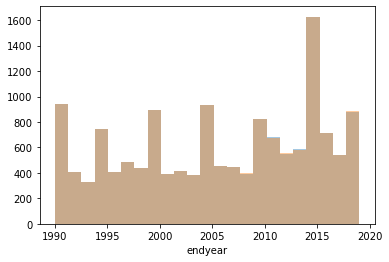

In [37]:
sns.distplot(clean['startyear'], kde=False)
sns.distplot(clean['endyear'], kde=False);

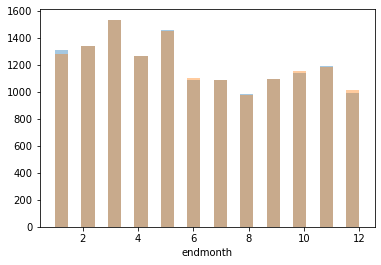

In [38]:
sns.distplot(clean['startmonth'], kde=False)
sns.distplot(clean['endmonth'], kde=False);
#Protests tend to stay within the same month and year

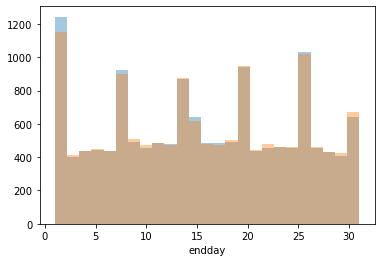

In [39]:
sns.distplot(clean['startday'], kde=False)
sns.distplot(clean['endday'], kde=False);

#Why is this? A lot at the start of the month, and every 7 days or so

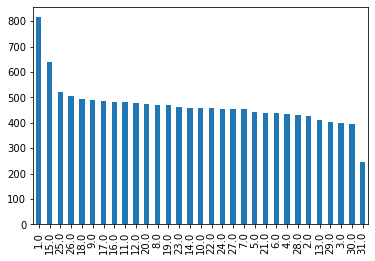

In [41]:
clean['startday'].sort_values().value_counts().plot(kind = 'bar');

The first and the 15th of the month are noticebly more frequent than other days, and this may be because protests are scheduled in advance, and the first or 15th of the month are more frequent? It would more work to under stand why, but its worth noting that they stand out.

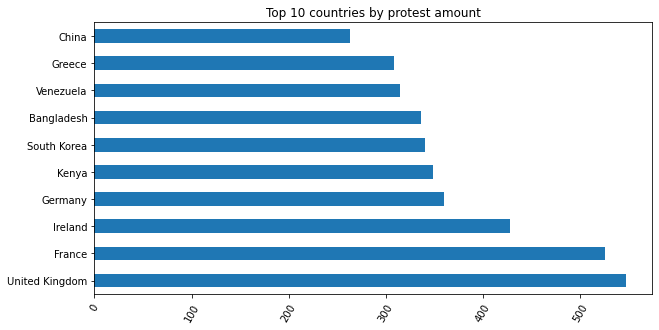

In [47]:
clean['country'].value_counts().head(10).plot(kind='barh',figsize=(10, 5),
                                           title='Top 10 countries by protest amount');

plt.xticks(rotation=60);

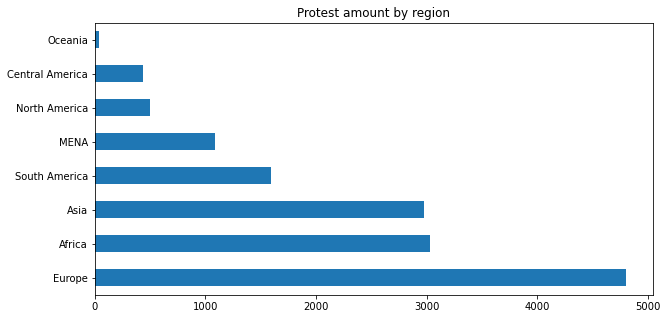

In [48]:
clean['region'].value_counts().head(10).plot(kind='barh',figsize=(10 , 5),
                                           title='Protest amount by region');

In [49]:
# Dataframes to dig deeper into unique countries
uk = clean[clean['country'] == 'United Kingdom']
france = clean[clean['country'] == 'France']
ireland = clean[clean['country'] == 'Ireland']
bangladesh = clean[clean['country'] == 'Bangladesh']

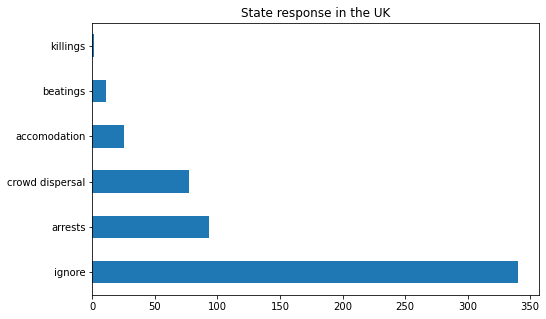

In [52]:
uk['stateresponse'].value_counts().plot(kind = 'barh',
                                        figsize=(8, 5), 
                                       title='State response in the UK');

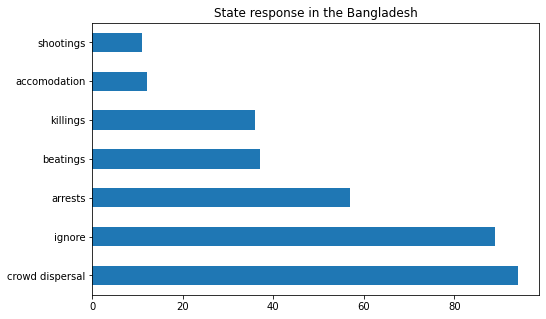

In [54]:
bangladesh['stateresponse'].value_counts().plot(kind = 'barh',
                                          figsize=(8, 5), 
                                          title='State response in the Bangladesh');


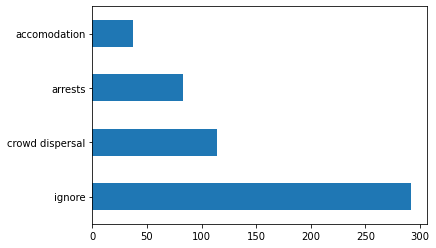

In [63]:
france['stateresponse'].value_counts().plot(kind = 'barh');
#No physical violence reported. Violence not reported

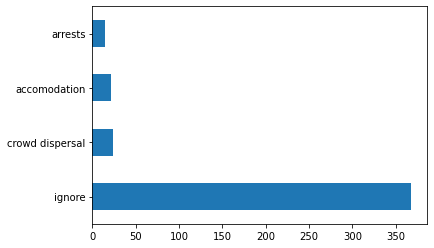

In [64]:
ireland['stateresponse'].value_counts().plot(kind='barh');

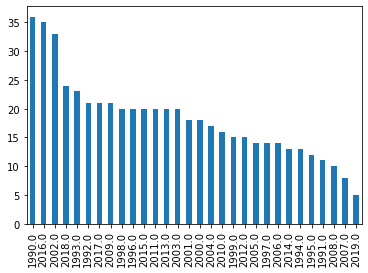

In [58]:
#years with the most protests by country

uk['startyear'].sort_values().value_counts().plot(kind = 'bar');

1990: Margaret Thatcher's poll tax induced riots in Trafalagar Square. March 31st, 1990. - April 1st
"But in the chaos of those hours I witnessed how venomous a crowd could become when enraged by a police force that seemed determined to provoke and prolong the disorder." -Oliver King

2016: Decision to withdraw from the European Union. AKA: Brexit

2002: Simultaneious protests in London, Belfast, and Glasgow to protest the Iraq War.
"All part of a worldwide weekend of protest with hundreds of rallies and marches in up to 60 countries." -BBC News



In [59]:
#http://news.bbc.co.uk/onthisday/hi/dates/stories/march/31/newsid_2530000/2530763.stm
#https://www.theguardian.com/commentisfree/2015/mar/31/poll-tax-riots-25-years-ago-political-awakening-carnage-trafalgar-square
#http://news.bbc.co.uk/2/hi/uk_news/2765041.stm

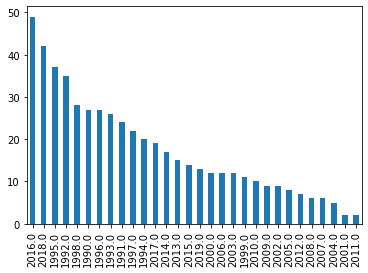

In [61]:
france['startyear'].sort_values().value_counts().plot(kind = 'bar');

2016: Months long protests in France over new labor laws

2018: Yellow Vest protests, protesting a fuel price increase

1995: Transport workers strike in Nov/Dec for 22 days

1992: 

-Truck barricades all over France to protest new traffic regulations. Nothing in or out of Paris for days. 
    
-18 yeasr old killed at the hands of police. "youth vs. police protests" for appx 3 days.
    
-Angered by U.S. agricultural trade policies, tractor-driving French farmers blockaded the entrance to the new Euro Disneyland outside Paris.

In [62]:
#https://www.bbc.com/news/world-europe-36531345
#https://www.bbc.com/news/world-europe-36531345
#http://edition.cnn.com/WORLD/9512/france_strike/12-16/index.html
#https://www.washingtonpost.com/archive/politics/1992/06/27/french-farmers-block-europes-disneyland/3024aefb-10e0-4b63-8b5f-e0b3c4db3d35/

## EDA: State Response 

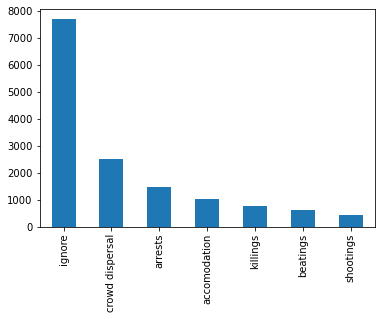

In [35]:
clean['stateresponse'].value_counts().plot(kind = 'bar');

In [8]:
#Turn column binary
df['stateresponse_violence'] = df['stateresponse'].map({'accomodation': 0, 'ignore': 0, 'crowd dispersal': 0,
                                                       'arrests': 1, 'beatings': 1, 'shootings': 1, 'killings': 1})

In [9]:
# drop text data
df.drop(columns = 'notes', inplace = True)

In [10]:
df.dtypes

protestnumber             int64
protesterviolence       float64
participants              int64
accomodation              int64
arrests                   int64
                         ...   
region_Europe             int64
region_MENA               int64
region_North America      int64
region_Oceania            int64
region_South America      int64
Length: 221, dtype: object

In [65]:
#How many events with violence have it on both sides?
df['state_protester_violence'] = df['stateresponse_violence'] * df['protesterviolence']
df['state_protester_violence'].value_counts()

0.0    12566
1.0     1908
Name: state_protester_violence, dtype: int64

In [8]:
df['stateresponse_violence'].value_counts()

0    11215
1     3259
Name: stateresponse_violence, dtype: int64

In [9]:
df['protesterviolence'].value_counts()

0.0    10668
1.0     3806
Name: protesterviolence, dtype: int64

In [10]:
violent_events = 3806 + 3259 - 1908
violent_events

5157

In [11]:
both_violent = 1908 / 5157
both_violent

0.3699825479930192

### Unique events
Protester violence: 1898

State Violence: 1351

Both violence: 1908

no violence: 9317

## EDA: Violence by country & region

In [66]:
#Match column to df[column]
clean['stateresponse_violence'] = clean['stateresponse'].map({'accomodation': 0, 'ignore': 0, 'crowd dispersal': 0,
                                                       'arrests': 1, 'beatings': 1, 'shootings': 1, 'killings': 1})

In [67]:
clean['state_protester_violence'] = clean['stateresponse_violence'] * clean['protesterviolence']

In [68]:
#Create new Dataframes by violence side
both = clean[clean['state_protester_violence'] == 1]

In [69]:
protester = clean[clean['protesterviolence'] == 1]

In [70]:
state = clean[clean['stateresponse_violence'] == 1]

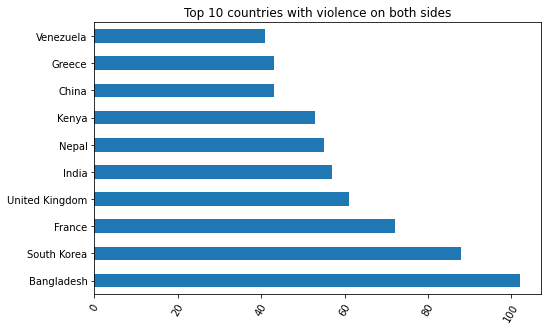

In [72]:
both['country'].value_counts().head(10).plot(kind='barh',figsize=(8 , 5),
                                           title='Top 10 countries with violence on both sides')
plt.xticks(rotation=60);

#Bangladesh is 7th in protest amount, but 1st in violence on both sides

In [25]:
bangladesh['stateresponse_violence'].value_counts(normalize=True)

0    0.580357
1    0.419643
Name: stateresponse_violence, dtype: float64

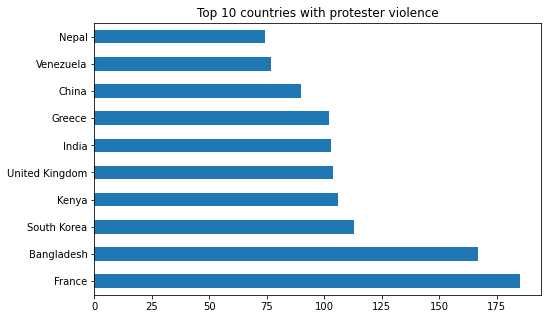

In [74]:
protester['country'].value_counts().head(10).plot(kind='barh',figsize=(8 , 5),
                                           title='Top 10 countries with protester violence');

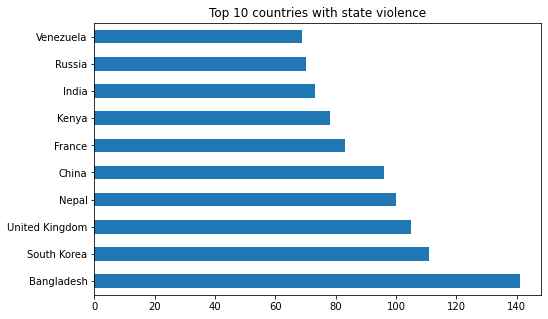

In [75]:
state['country'].value_counts().head(10).plot(kind='barh',figsize=(8, 5),
                                           title='Top 10 countries with state violence');

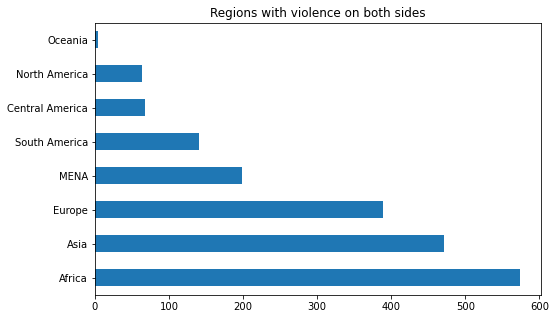

In [76]:
both['region'].value_counts().head(10).plot(kind='barh',figsize=(8, 5),
                                           title='Regions with violence on both sides');

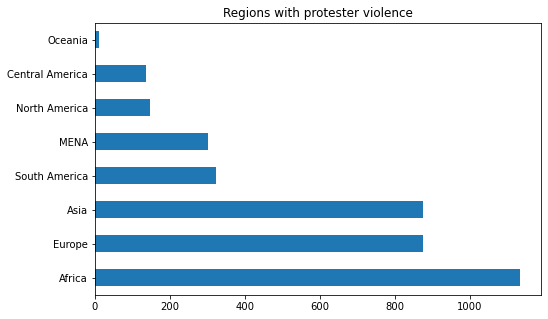

In [78]:
protester['region'].value_counts().head(10).plot(kind='barh',figsize=(8, 5),
                                           title='Regions with protester violence');

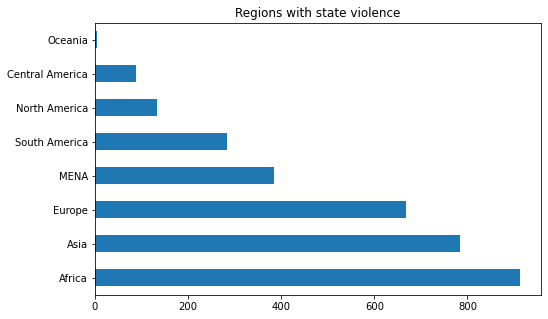

In [79]:
state['region'].value_counts().head(10).plot(kind='barh',figsize=(8, 5),
                                           title='Regions with state violence');

In [43]:
both['region'].value_counts(normalize = True)

Africa             0.300839
Asia               0.246855
Europe             0.203878
MENA               0.103774
South America      0.073899
Central America    0.035639
North America      0.033019
Oceania            0.002096
Name: region, dtype: float64

In [67]:
#Country with the most violence on both sides
bangladesh['state_protester_violence'].value_counts(normalize=True)

0.0    0.696429
1.0    0.303571
Name: state_protester_violence, dtype: float64

In [68]:
bangladesh['protesterviolence'].value_counts(normalize=True)

0.0    0.502976
1.0    0.497024
Name: protesterviolence, dtype: float64

In [69]:
bangladesh['stateresponse_violence'].value_counts(normalize=True)

0    0.580357
1    0.419643
Name: stateresponse_violence, dtype: float64

In [31]:
#Region with most violence on both sides
africa = clean[clean['region'] == 'Africa']

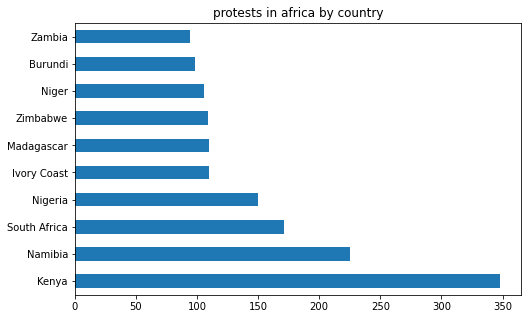

In [80]:
africa['country'].value_counts().head(10).plot(kind='barh',figsize=(8, 5),
                                           title='protests in africa by country');

### Correlation

In [8]:
df['protesterviolence'].corr(df['stateresponse_violence'])

0.39489971130397167

In [9]:
df['duration'].corr(df['stateresponse_violence'])

0.04893968495489126

In [10]:
df['protesterviolence'].corr(df['duration'])

0.0343713593442654

In [11]:
df['participants'].corr(df['stateresponse_violence'])

-0.016404154625459192

In [12]:
df['participants'].corr(df['protesterviolence'])

-0.02129688948425648

# Modeling

## State Response as target

In [24]:
#baseline accuracy
df['stateresponse_violence'].value_counts(normalize = True)

0    0.774838
1    0.225162
Name: stateresponse_violence, dtype: float64

In [25]:
# Define X and y variables
sr_X = df._get_numeric_data().drop(columns = 'stateresponse_violence')
sr_y = df['stateresponse_violence']

In [26]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(sr_X, sr_y,
                                                   random_state=42)

In [27]:
# Scale
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Ada Boost

In [19]:
ada = AdaBoostClassifier()
ada.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [20]:
print('Train score: ', ada.score(X_train_sc, y_train))
print('Test score: ', ada.score(X_test_sc, y_test))

Train score:  0.804606172270843
Test score:  0.7952473058856038


In [23]:
#Grid search
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

ada_params = {
    'n_estimators': [60, 65, 75,
    'learning_rate': [.9, .8],
    'base_estimator__max_depth': [2, 3, 4]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=4)
gs.fit(X_train_sc, y_train)
print('GridSearchCV score ', gs.best_score_)
gs.best_params_

GridSearchCV score  0.805803398631171


{'base_estimator__max_depth': 2, 'learning_rate': 0.8, 'n_estimators': 65}

In [ ]:
#{'base_estimator__max_depth': 2, 'learning_rate': 0.9, 'n_estimators': 50}
#.804

#{'base_estimator__max_depth': 2, 'learning_rate': 0.8, 'n_estimators': 65} CV=4
#.806


In [24]:
print('Train score: ', gs.score(X_train_sc, y_train))
print('Test score: ', gs.score(X_test_sc, y_test))

Train score:  0.8268079226163059
Test score:  0.804642166344294


## Protester Violence as target

### Ada Boost

In [8]:
#Base accuracy
df['protesterviolence'].value_counts(normalize = True)

0.0    0.737046
1.0    0.262954
Name: protesterviolence, dtype: float64

In [9]:
pv_X = df._get_numeric_data().drop(columns = 'protesterviolence')
pv_y = df['protesterviolence']

In [10]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(pv_X, pv_y,
                                                   random_state=42)

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [12]:
ada = AdaBoostClassifier()
ada.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [13]:
print('Train score: ', ada.score(X_train_sc, y_train))
print('Test score: ', ada.score(X_test_sc, y_test))

Train score:  0.8736066328880701
Test score:  0.8632218844984803


In [14]:
#Grid search
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

ada_params = {
    'n_estimators': [120 , 90, 100],
    'learning_rate': [.7, .6, .5],
    'base_estimator__max_depth': [1, 2, 3]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=4)
gs.fit(X_train_sc, y_train)
print('GridSearchCV score ', gs.best_score_)
gs.best_params_

GridSearchCV score  0.8716715704103255


{'base_estimator__max_depth': 1, 'learning_rate': 0.7, 'n_estimators': 100}

In [15]:
print('Train score: ', gs.score(X_train_sc, y_train))
print('Test score: ', gs.score(X_test_sc, y_test))

Train score:  0.8737908797789037
Test score:  0.8651561204752695
